<a href="https://colab.research.google.com/github/JNSDKV/Bike-sharing-demand-ML-regression-/blob/main/Bike_sharing_demand_ML_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual

# **Project Summary -**

**The introduction of rental bikes in urban cities has become a popular means of transportation for many people. It has not only enhanced mobility comfort but has also helped reduce traffic congestion and air pollution. However, ensuring that rental bikes are available and accessible to the public at the right time has become a major concern. To address this concern, this project aims to predict the bike count required at each hour for the stable supply of rental bikes.

The stable supply of rental bikes is crucial in ensuring that there is a consistent availability of rental bikes for the public. This can be achieved through the prediction of bike count required at each hour. By predicting the bike count required, bike rental companies can plan for the required number of bikes and ensure that there is no shortage or excess of rental bikes.

The prediction of bike count required at each hour involves the use of data analysis and machine learning algorithms. Historical data on bike rental usage, weather conditions, and other factors that affect bike rental usage will be analyzed. Machine learning algorithms such as regression and time series analysis will be used to analyze the data and predict the bike count required at each hour.

The project will involve the collection of data on bike rental usage, weather conditions, and other factors that affect bike rental usage. This data will be used to train the machine learning algorithms to predict the bike count required at each hour. The trained algorithms will then be used to predict the bike count required for future periods.

The project will also involve the development of a user-friendly interface that will allow bike rental companies to input data and receive predictions on the required bike count. This interface will make it easy for bike rental companies to plan for the required number of bikes and ensure that there is no shortage or excess of rental bikes.

The project will be beneficial to bike rental companies as it will help them plan for the required number of bikes and ensure that there is a stable supply of rental bikes. This will enhance the availability and accessibility of rental bikes to the public, leading to increased usage of rental bikes and reduced traffic congestion and air pollution.

In conclusion, the introduction of rental bikes in urban cities has enhanced mobility comfort, reduced traffic congestion and air pollution. However, ensuring a stable supply of rental bikes has become a major concern. This project aims to predict the bike count required at each hour for the stable supply of rental bikes. By analyzing historical data on bike rental usage, weather conditions, and other factors that affect bike rental usage, machine learning algorithms will be used to predict the bike count required at each hour. The project will be beneficial to bike rental companies and the public as it will enhance the availability and accessibility of rental bikes, leading to increased usage of rental bikes and reduced traffic congestion and air pollution.**






# **GitHub Link -**

https://github.com/JNSDKV/Bike-sharing-demand-ML-regression-

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData (3).csv',encoding='Unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

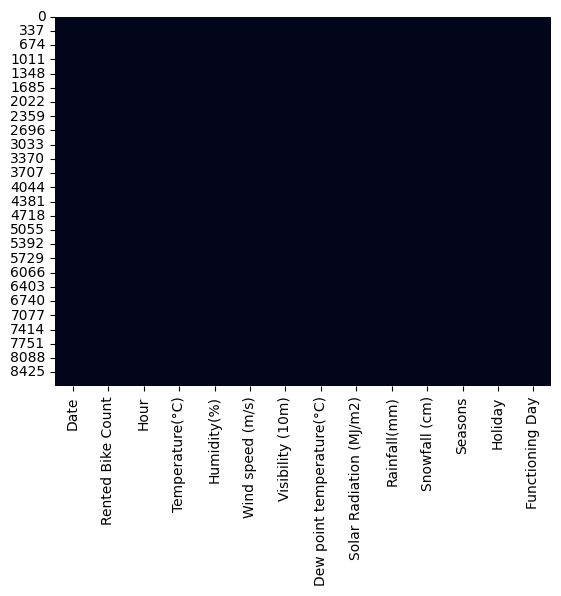

In [9]:
# Visualizing the missing values
## Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

-> The above dataset has 8760 rows and 14 columns.  It seems that the dataset is relatively clean, as there are no mising values in the dataset. Also there are no duplicate values in the dataset. 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns.tolist()

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [10]:
# Dataset Describe
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Variables Description 

 The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:

.Date: the date in the format of year-month-day

.Rented Bike Count: the count of bikes rented at each hour

.Hour: the hour of the day

.Temperature: the temperature in Celsius

.Humidity: the percentage of humidity

.Windspeed: the wind speed in meters per second

.Visibility: the visibility in 10 meters.

.Dew Point Temperature: the dew point temperature in Celsius

.Solar Radiation: the solar radiation in MJ/m2

.Rainfall: the amount of rainfall in millimeters

.Snowfall: the amount of snowfall in centimeters

.Seasons: the season of the year, which can be Winter, Spring, Summer, or Autumn

.Holiday: whether the day is a holiday or not

.Functional Day: whether the day is a functional day (i.e., business day) or a non-functional day (i.e., weekend or holiday)
 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# Write your code to make your dataset analysis ready
df1 = df.copy()


In [12]:
df1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [13]:
df1.rename(columns={'Snowfall (cm)': 'Snowfall', 'Rainfall(mm)': 'Rainfall','Solar Radiation (MJ/m2)' : 'Solar Radiation','Dew point temperature(°C)' : 'Dew point temperature', 'Visibility (10m)' : 'Visibility', 'Wind speed (m/s)' : 'Wind speed', 'Humidity(%)' : 'Humidity', 'Temperature(°C)' : 'Temperature'}, inplace=True)

In [14]:
df1['Date'] = pd.to_datetime(df1['Date']) 
df1['Date']
df1['Day']=df1['Date'].dt.day
df1['Month']=df1['Date'].dt.month
df1['Year']=df1['Date'].dt.year

In [15]:
df1.drop(['Date'],axis=1,inplace=True)

In [16]:
df1.head(1)

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [17]:
df1.shape

(8760, 16)

In [18]:
# Check Unique Values for each variable.
print(df1.apply(lambda col: col.unique()))

Rented Bike Count        [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...
Hour                     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Temperature              [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....
Humidity                 [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...
Wind speed               [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...
Visibility               [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...
Dew point temperature    [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...
Solar Radiation          [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...
Rainfall                 [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...
Snowfall                 [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...
Seasons                                   [Winter, Spring, Summer, Autumn]
Holiday                                              [No Holiday, Holiday]
Functioning Day                                                  [Yes, No]
Day                      

In [19]:
#Creating function to return all the unique values each categorical column can have
def cat_unique_vals(cat_cols,df1):
  for col in cat_cols:
    print("The values that the categorical column",col,"can take are:",df1[col].unique())

In [20]:
#Checking the possible values important and meaningful categorical columns can have.
categorical_columns=['Seasons','Holiday','Functioning Day']
cat_unique_vals(categorical_columns,df1)

The values that the categorical column Seasons can take are: ['Winter' 'Spring' 'Summer' 'Autumn']
The values that the categorical column Holiday can take are: ['No Holiday' 'Holiday']
The values that the categorical column Functioning Day can take are: ['Yes' 'No']


In [21]:
df1.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [22]:
df1.isnull().sum()

Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
Day                      0
Month                    0
Year                     0
dtype: int64

In [23]:
df1.duplicated().sum()

0

### What all manipulations have you done and insights you found?

* I have performed some data cleaning and transformation operations on the dataset. Specifically, I have checked for missing and duplicate values and found none. I have also modified the date column by extracting the day, month, and year values and created three new columns based on this information. Finally, I have removed the original date column from the dataset.

* The insights or benefits of these data manipulations may include improved data quality, enhanced ability to perform analysis, and easier interpretation of results. By checking for missing and duplicate values, I have ensured that the dataset is complete and accurate, which can reduce errors in subsequent analysis. By extracting the day, month, and year values from the date column, I have created additional variables that can be used to explore trends or patterns in the data. And by removing the original date column, I have simplified the dataset and made it easier to work with.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## UNIVARIATE ANALYSIS

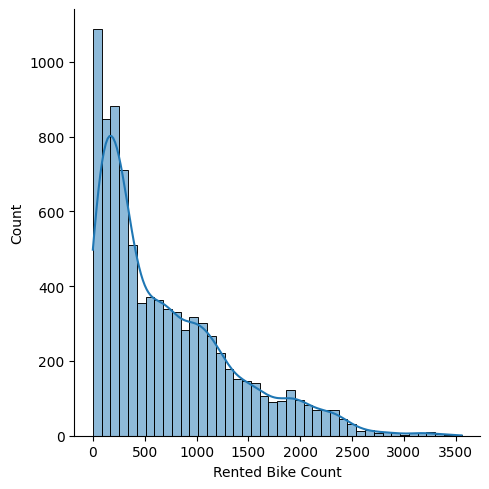

In [24]:
# Chart - 1 visualization code

sns.displot(kind='hist',data=df1,x ='Rented Bike Count',kde=True)

In [25]:
df1['Rented Bike Count'].skew()

1.1534281773679014

<Axes: >

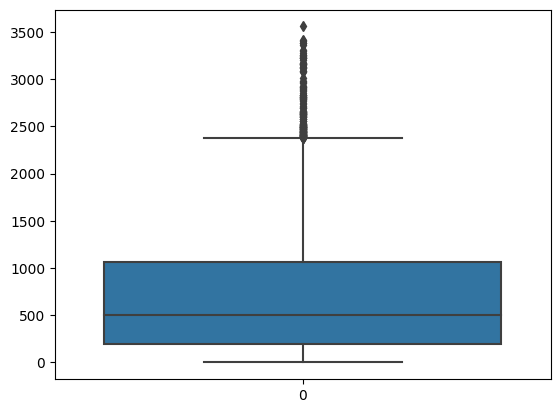

In [26]:
sns.boxplot(df1['Rented Bike Count'])

In [27]:
df1['Rented Bike Count'].isnull().sum()

0

##### 1. Why did you pick the specific chart?

* Because for univariate analysis on numerical columns we can plot histogram, kde and boxplot to explore the distribution of data.
* This plot can also help to identify skewness and outliers.
* So i used histogram, kde and box plot on Rented Bike Count column to get the information about distribution of data.

##### 2. What is/are the insight(s) found from the chart?

* Rented Bike Count is not normally distributed.There is 1.15 skewness in this column of data .
* There is some outliers in Rented Bike Count column.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can have a positive impact on the business by helping to optimize inventory and meet demand, leading to increased profits. However, outliers and skewness in the data can have negative impacts if not addressed, such as skewness indicating peak demand periods and outliers affecting the accuracy of statistical analyses. Therefore, businesses must consider both the positive and negative impacts of the insights and take appropriate steps to address them.

#### Chart - 2

In [28]:
# Chart - 2 visualization code

In [29]:
#Creating function to return all the unique values each categorical column can have
def cat_unique_vals(cat_cols,df1):
  for col in cat_cols:
    print("The values that the categorical column",col,"can take are:",df1[col].unique())

In [30]:
#Checking the possible values important and meaningful categorical columns can have.
categorical_columns=['Seasons','Holiday','Functioning Day']
cat_unique_vals(categorical_columns,df1)

The values that the categorical column Seasons can take are: ['Winter' 'Spring' 'Summer' 'Autumn']
The values that the categorical column Holiday can take are: ['No Holiday' 'Holiday']
The values that the categorical column Functioning Day can take are: ['Yes' 'No']


<Axes: >

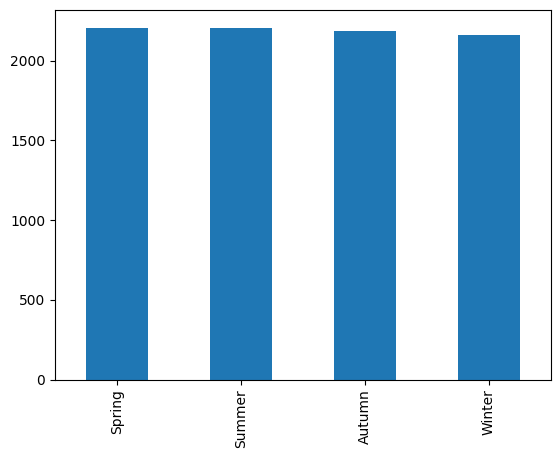

In [31]:
df1['Seasons'].value_counts().plot(kind='bar')

<Axes: ylabel='Seasons'>

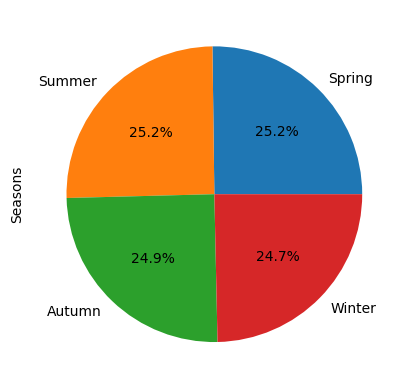

In [32]:
df1['Seasons'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='Holiday'>

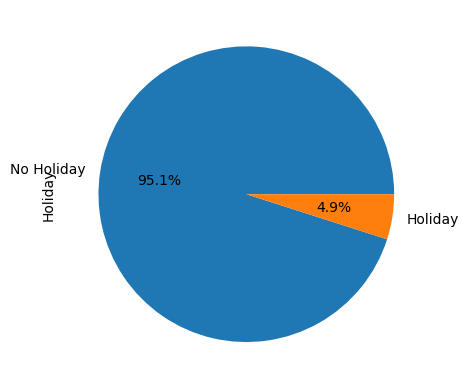

In [33]:
df1['Holiday'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='Functioning Day'>

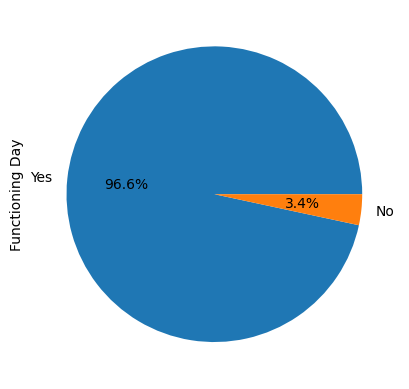

In [34]:
df1['Functioning Day'].value_counts().plot(kind='pie',autopct='%0.1f%%')

##### 1. Why did you pick the specific chart?

Because for univariate analysis on categorical columns we can plot barplot, pie and to explore the distribution of data.
* Bar charts and pie charts are commonly used in univariate analysis for categorical variables because they provide a visual representation of the frequency distribution of the categories. Bar charts are useful for discrete categories with a small number of values, and they use rectangular bars to represent the frequency of each category. Pie charts are useful for showing the proportion of each category in the total sample and are particularly useful when there are few categories. Overall, these charts help in identifying patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

Insights-:
* we can observed that equal number of bikes rented in each seasons.
* More number of bikes rented on no holidays.
* In the given dataset there is almost all days are functioning days.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes, gained insights help in business for growth.
* By seeing information we can say that there is more demand of rented bikes on no holidays so we can supply bikes accordingly.
* It will help that more and more customers can use this service.

#### Chart - 3 BIVARIATE ANALAYSIS

In [ ]:
# Chart - 3 visualization code



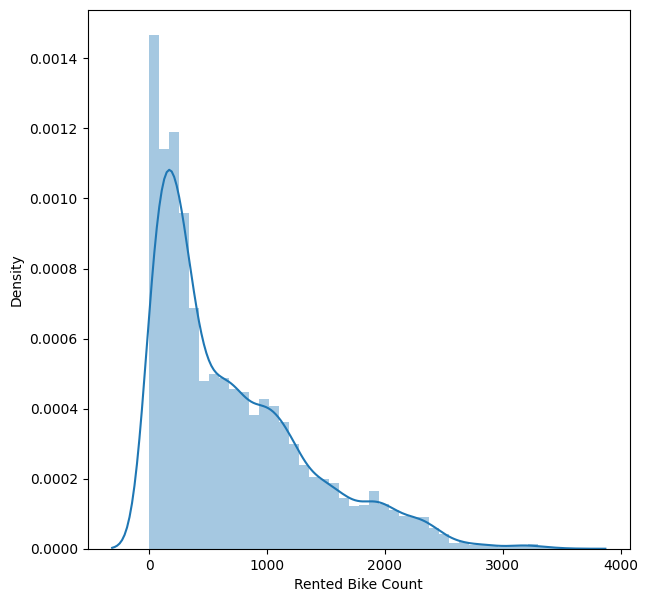

In [35]:
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'])
plt.show()

In [36]:
def plot_graphs(column_name):
  plt.figure(figsize=(7,7))
  #sns.distplot(df1['column_name'])
  sns.distplot(kde=True,data=df1,x=column_name,label=column_name)
  sns.catplot(kind='box',data=df1,x=column_name)


In [37]:
num_columns = df1.select_dtypes(include=['float64','int64']).iloc[:,[1,2,3,4,5,6,7,8,9]].columns

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<Axes: xlabel='Humidity', ylabel='Rented Bike Count'>

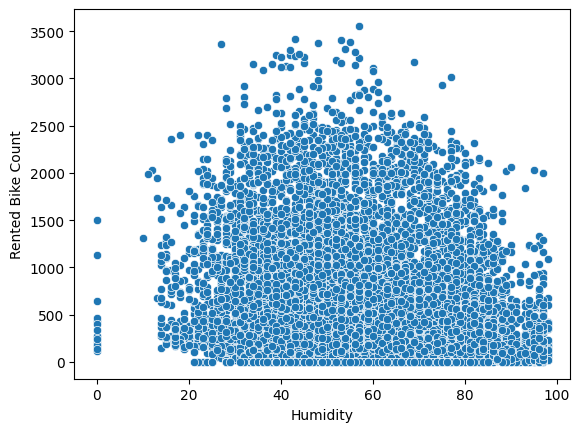

In [39]:
# Chart - 4 visualization code
sns.scatterplot(data=df1,x='Humidity',y='Rented Bike Count')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='Visibility', ylabel='Rented Bike Count'>

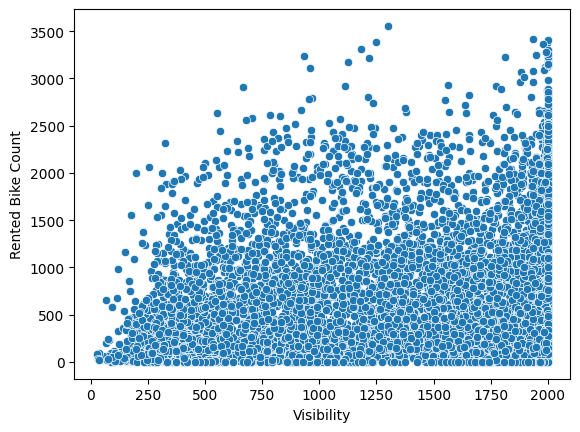

In [ ]:
# Chart - 5 visualization code
sns.scatterplot(data=df1,x='Visibility',y='Rented Bike Count')

<Axes: xlabel='Temperature', ylabel='Rented Bike Count'>

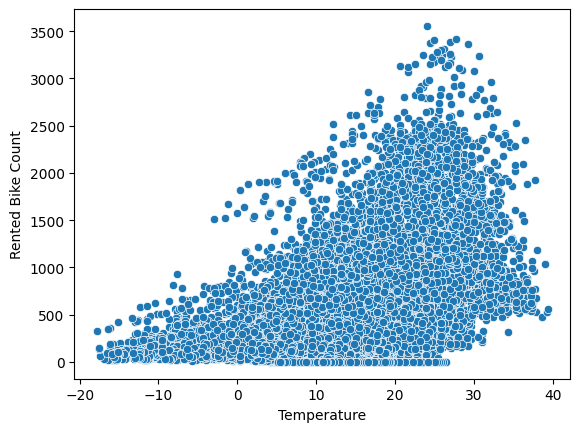

In [ ]:
sns.scatterplot(data=df1,x='Temperature',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

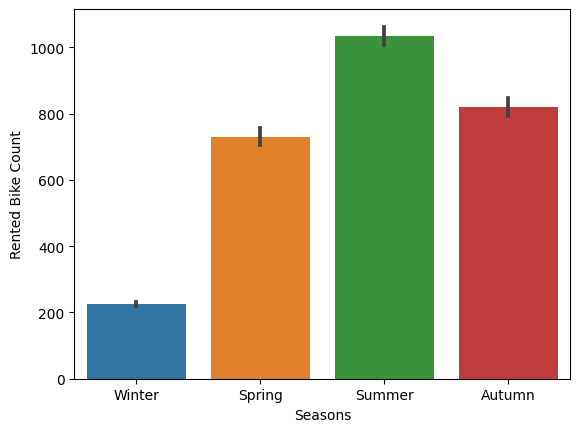

In [40]:
# Chart - 6 visualization code
sns.barplot(data=df1,x='Seasons',y='Rented Bike Count')

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

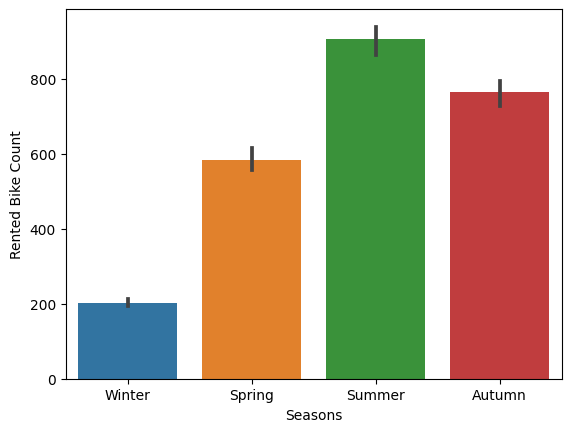

In [41]:
sns.barplot(data=df1,x='Seasons',y='Rented Bike Count',estimator=np.median)

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

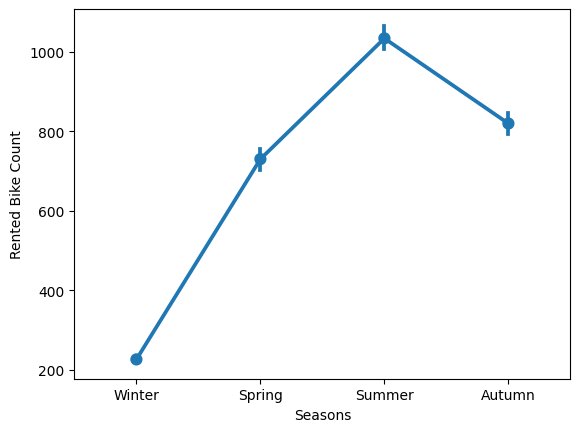

In [42]:
sns.pointplot(data=df1,x='Seasons',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

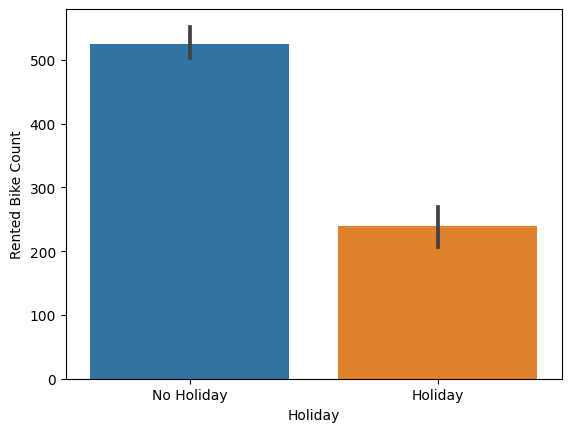

In [ ]:
# Chart - 7 visualization code
sns.barplot(data=df1,x='Holiday',y='Rented Bike Count',estimator=np.median)

(array([0, 1]), [Text(0, 0, 'No Holiday'), Text(1, 0, 'Holiday')])

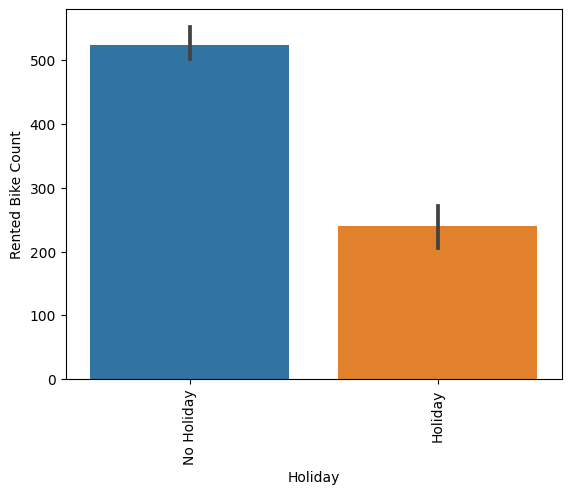

In [ ]:
sns.barplot(data=df1,x='Holiday',y='Rented Bike Count',estimator=np.median)
plt.xticks(rotation='vertical')

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

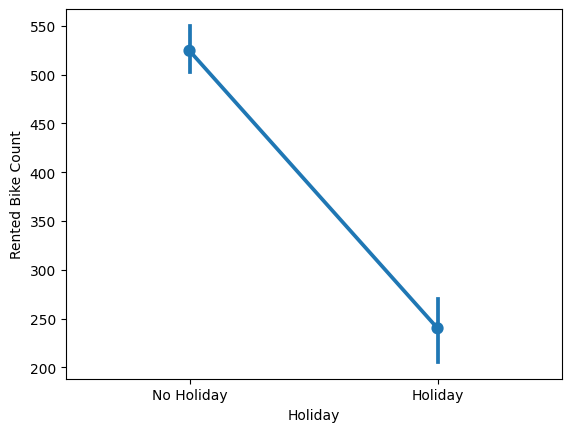

In [ ]:
sns.pointplot(data=df1,x='Holiday',y='Rented Bike Count',estimator=np.median)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
pd.crosstab(df1['Seasons'],df1['Holiday'])

Holiday,Holiday,No Holiday
Seasons,,
Autumn,120,2064
Spring,72,2136
Summer,48,2160
Winter,192,1968


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [43]:
# Chart - 9 visualization code
df1.corr()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Day,Month,Year
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,4.684885e-02,7.086107e-02,2.151618e-01
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,4.206322e-16,1.036729e-15,2.336763e-14
Temperature,0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,8.090791e-02,4.968327e-02,3.777958e-01
Humidity,-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,7.047359e-03,4.779778e-02,3.592468e-02
Wind speed,0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-6.123440e-02,-8.206909e-02,-3.780878e-03
Visibility,0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-1.068595e-01,7.788783e-02,5.238110e-02
Dew point temperature,0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,6.970777e-02,6.510073e-02,3.363497e-01
Solar Radiation,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.445555e-03,-3.041240e-02,1.280860e-01
Rainfall,-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,1.199827e-02,-2.279368e-02,2.752192e-02
Snowfall,-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,1.014355e-01,5.475846e-02,-2.064178e-01


<Axes: >

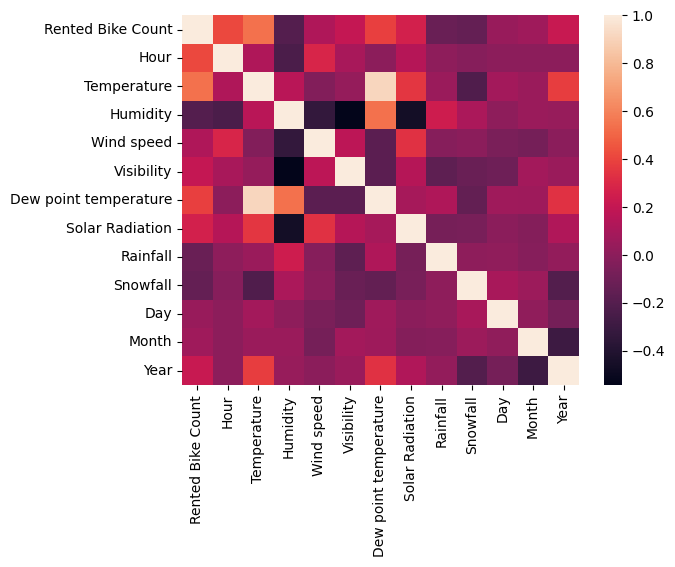

In [44]:
sns.heatmap(df1.corr())

In [45]:
df1.corr()['Rented Bike Count']

Rented Bike Count        1.000000
Hour                     0.410257
Temperature              0.538558
Humidity                -0.199780
Wind speed               0.121108
Visibility               0.199280
Dew point temperature    0.379788
Solar Radiation          0.261837
Rainfall                -0.123074
Snowfall                -0.141804
Day                      0.046849
Month                    0.070861
Year                     0.215162
Name: Rented Bike Count, dtype: float64

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

<function matplotlib.pyplot.show(close=None, block=None)>

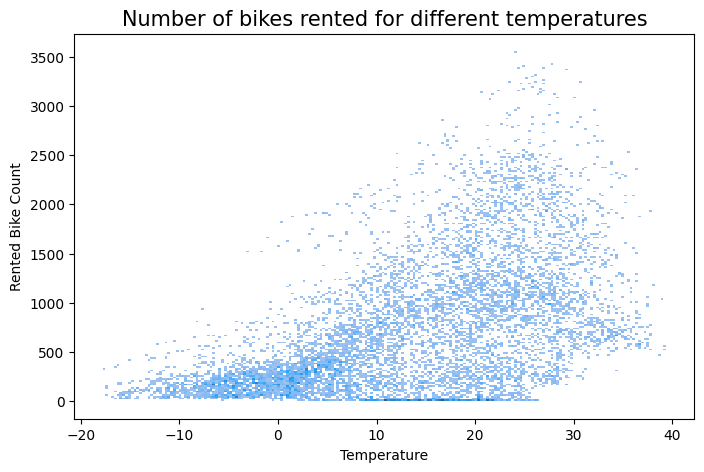

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(8,5))
sns.histplot(data=df1,x='Temperature',y='Rented Bike Count',bins=200)
plt.title('Number of bikes rented for different temperatures',size=15)
plt.show

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

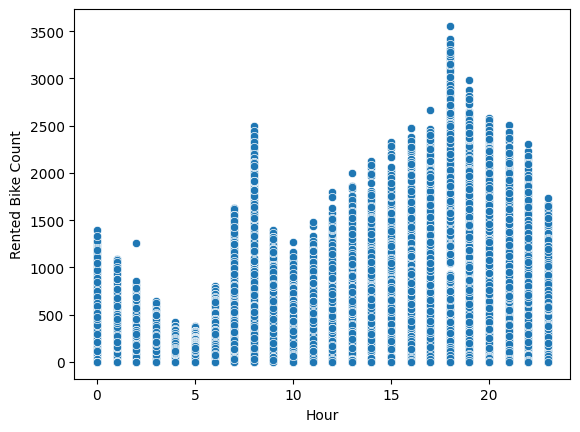

In [ ]:
# Chart - 11 visualization code

sns.scatterplot(data=df1,x='Hour',y='Rented Bike Count')

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

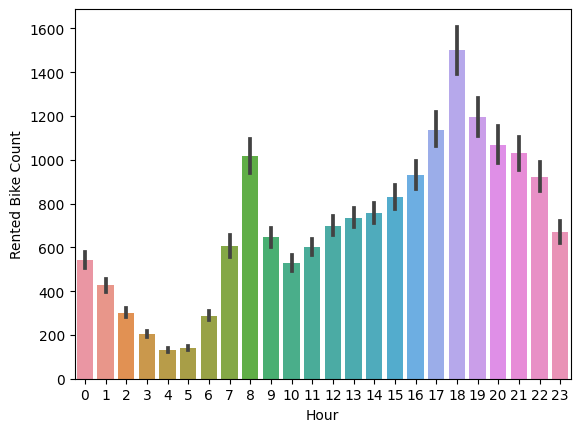

In [ ]:
sns.barplot(data=df1,x='Hour',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***